In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

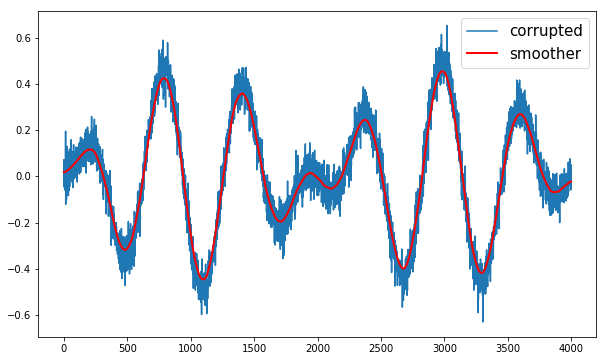

In [2]:
n = 4000

t = np.arange(n).reshape(-1, 1)
x = 0.5*np.sin((2*np.pi/n)*t) * (np.sin(0.01*t)) # 0.5sin((sin0.01t)wt)
x_cor = x + 0.05*np.random.randn(n,1)

mu = 1000

D = np.zeros([n-1, n]) # D (n-1)xn zero matrix
D[:,0:n-1] -= np.eye(n-1)  # D -> 0:n-1 = 0 ~ n-2 -> 1 ~ n~1 
D[:,1:n] += np.eye(n-1) # D -> matrix of column vetors 2 ~ n 

A = np.vstack([np.eye(n), np.sqrt(mu)*D])
b = np.vstack([x_cor, np.zeros([n-1,1])])

A = np.asmatrix(A)
b = np.asmatrix(b)

x_reconst = (A.T*A).I*A.T*b   # least square problem 

plt.figure(figsize=(10, 6))
plt.plot(t, x_cor, '-', label='corrupted');
plt.plot(t, x_reconst, 'r', label='smoother', linewidth=2)
plt.legend(fontsize=15)
plt.show()

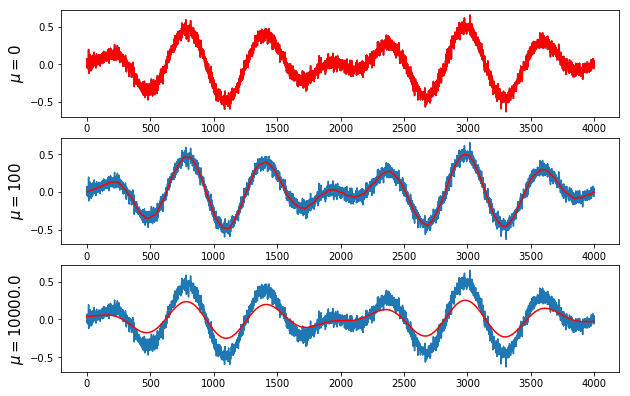

In [3]:
plt.figure(figsize=(10,9))
mu = [0, 100, 1e4];

for i in range(len(mu)):    # len(mu) = list 객체 갯수
    A = np.vstack([np.eye(n), np.sqrt(mu[i])*D])
    b = np.vstack([x_cor, np.zeros([n-1,1])])

    A = np.asmatrix(A)
    b = np.asmatrix(b)

    x_reconst = (A.T*A).I*A.T*b   # least square problem 

    plt.subplot(4,1,i+1)
    plt.plot(t, x_cor, '-')
    plt.plot(t, x_reconst, 'r')
    plt.ylabel('$\mu = {}$'.format(mu[i]), fontsize=15)

plt.show()

In [5]:
# cvxpy

n = 4000

t = np.arange(n).reshape(-1, 1)
x = 0.5*np.sin((2*np.pi/n)*t) * (np.sin(0.01*t)) # 0.5sin((sin0.01t)wt)
x_cor = x + 0.05*np.random.randn(n,1)

mu = 1000

x_reconst = cvx.Variable((n,1))

d = x_reconst-x_cor
s = x_reconst[1:n]-x_reconst[0:n-1]

obj = cvx.Minimize(cvx.sum_squares(d) + \
                   mu*cvx.sum_squares(s))

# obj = cvx.Minimize(cvx.sum_squares(x_reconst-x_cor) + \
#                   mu*cvx.sum_squares(x_reconst[1:n]-x_reconst[0:n-1]))
# [x2 - x1, x3 - x2, x4 - x3, .... , xn - xn-1].reshape(-1. 1)
# obj = cvx.Minimize(cvx.sum_squares(x_reconst - x_cor) + \
#                   mu*cvx.sum_squares(D*x_reconst))
prob = cvx.Problem(obj).solve('SCS')

plt.figure(figsize=(10, 6))
plt.plot(t, x_cor)
plt.plot(t, x_reconst.value, 'r', linewidth = 2)
title ='=%s' % str(mu)
plt.title('$\mu$' + title, fontsize = 17)
plt.legend(['corrupted', 'smoother'], loc = 1)
plt.show()

SolverError: The solver SCS is not installed.

In [10]:
# Signal with Sharp Transition + Noise

n = 2000
t = np.arange(n).reshape(-1, 1)

exact = np.vstack([np.ones([500,1]), -np.ones([500,1]), \
                   np.ones([500,1]), -np.ones([500,1])])

x = exact + 0.5*np.sin((2*np.pi/n)*t)
exact_variation = np.sum(np.abs(exact[1:n] - exact[0:n-1]))

noise = 0.1*np.random.randn(n,1)
x_cor = x + noise
noise_variation = np.sum(np.abs(x_cor[1:n] - x_cor[0:n-1]))

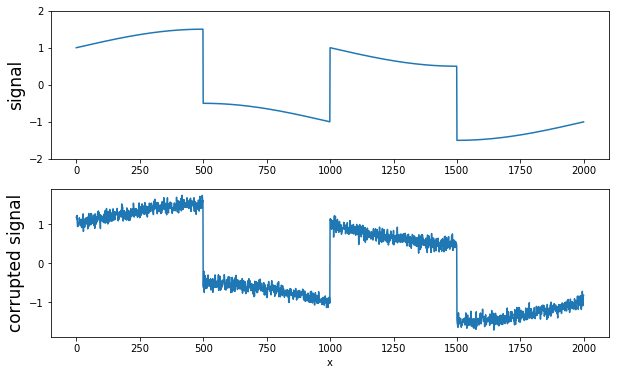

In [11]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.ylim([-2.0, 2.0])
plt.ylabel('signal', fontsize=17)b

plt.subplot(2, 1, 2)
plt.plot(t, x_cor)
plt.ylabel('corrupted signal', fontsize=17)
plt.xlabel('x')
plt.show()

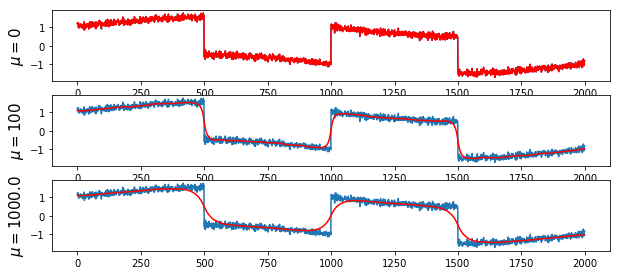

In [13]:
plt.figure(figsize=(10, 6))

mu = [0, 100, 1e3];

D = np.zeros([n-1, n]) # D (n-1)xn zero matrix
D[:,0:n-1] -= np.eye(n-1)  # D -> 0:n-1 = 0 ~ n-2 -> 1 ~ n~1 
D[:,1:n] += np.eye(n-1) # D -> matrix of column vetors 2 ~ n 

for i in range(len(mu)):    # len(mu) = list 객체 갯수
    A = np.vstack([np.eye(n), np.sqrt(mu[i])*D])
    b = np.vstack([x_cor, np.zeros([n-1,1])])

    A = np.asmatrix(A)
    b = np.asmatrix(b)

    x_reconst = (A.T*A).I*A.T*b   # least square problem 

    plt.subplot(4,1,i+1)
    plt.plot(t, x_cor, '-')
    plt.plot(t, x_reconst, 'r')
    plt.ylabel('$\mu = {}$'.format(mu[i]), fontsize=15)

plt.show()

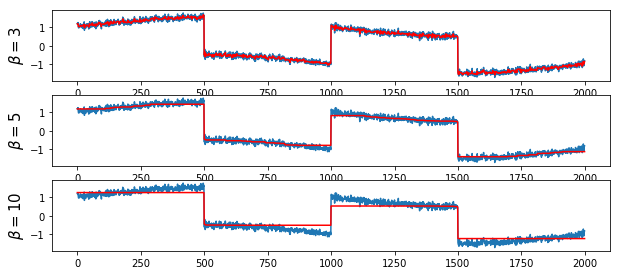

In [14]:
# cvx 1-norm

plt.figure(figsize=(10, 6))

beta = [3, 5, 10]

for i in range(len(beta)):    
    x_reconst = cvx.Variable(n)
    obj = cvx.Minimize(cvx.norm(x_reconst[1:n] - x_reconst[0:n-1], 1))
    const = [cvx.norm(x_reconst-x_cor, 2) <= beta[i]]
    prob = cvx.Problem(obj, const).solve()

    plt.subplot(4,1,i+1)
    plt.plot(t, x_cor, '-')
    plt.plot(t, x_reconst.value, 'r')
    plt.ylabel(r'$\beta = {}$'.format(beta[i]), fontsize=15)

plt.show()